[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-1-4115968531.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


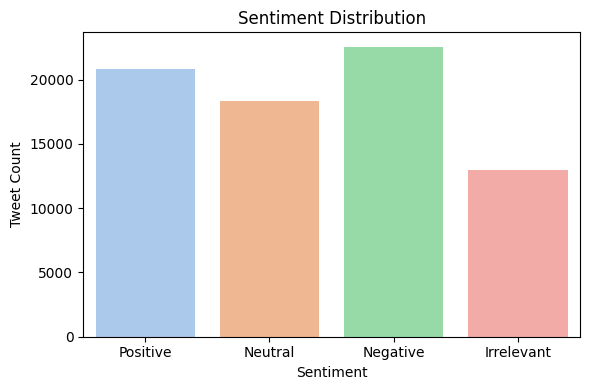

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

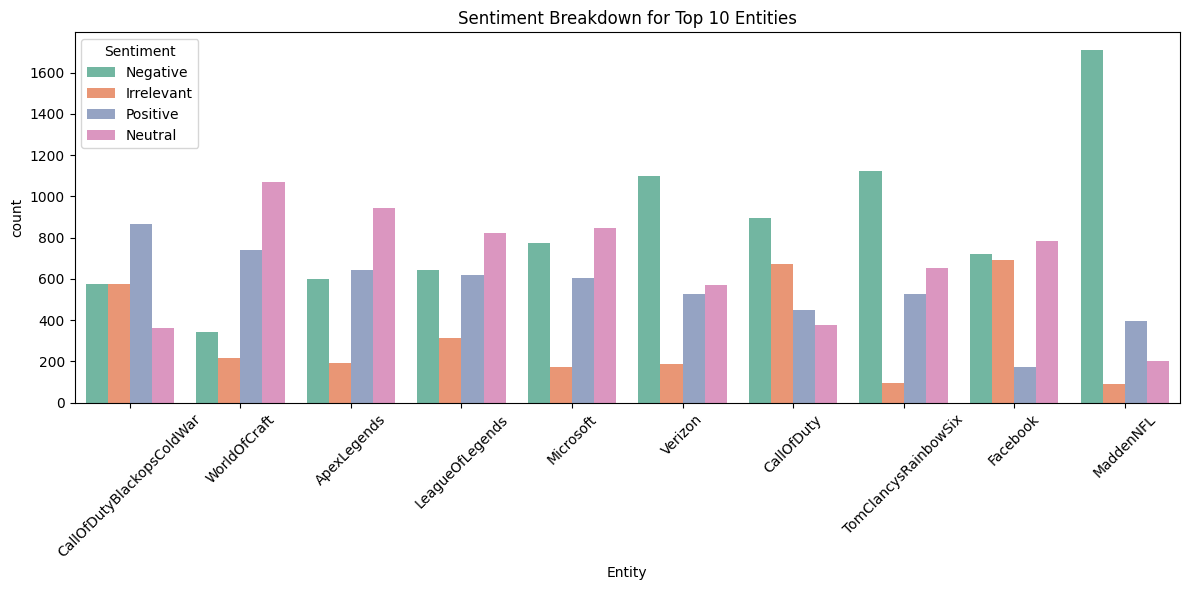

📊 Sentiment Classification Report:

              precision    recall  f1-score   support

    Negative       0.76      0.76      0.76      4509
     Neutral       0.65      0.66      0.65      3650
    Positive       0.74      0.73      0.73      4180

    accuracy                           0.72     12339
   macro avg       0.71      0.71      0.71     12339
weighted avg       0.72      0.72      0.72     12339



In [1]:
# Install necessary libraries
!pip install nltk wordcloud scikit-learn --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

#  Download stopwords
nltk.download('stopwords')

#  Clean tweet text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)           # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)                          # Remove @mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)                       # Remove special characters and numbers
    text = text.lower()                                           # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

df['Cleaned'] = df['Tweet'].astype(str).apply(clean_text)

#  Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()

#  Generate word clouds
positive_tweets = " ".join(df[df['Sentiment'].str.lower() == 'positive']['Cleaned'])
negative_tweets = " ".join(df[df['Sentiment'].str.lower() == 'negative']['Cleaned'])

# Positive WordCloud
plt.figure(figsize=(10, 5))
WordCloud(width=800, height=400, background_color='white').generate(positive_tweets).to_image().show()

# Negative WordCloud
plt.figure(figsize=(10, 5))
WordCloud(width=800, height=400, background_color='black').generate(negative_tweets).to_image().show()

#  Top Entities by Sentiment
top_entities = df['Entity'].value_counts().head(10).index
subset = df[df['Entity'].isin(top_entities)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='Entity', hue='Sentiment', palette='Set2')
plt.title("Sentiment Breakdown for Top 10 Entities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Prepare for ML (only Positive, Negative, Neutral)
filtered = df[df['Sentiment'].str.lower().isin(['positive', 'negative', 'neutral'])]

X = filtered['Cleaned']
y = filtered['Sentiment']

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_vector = vectorizer.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.2, random_state=42)

#  Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("📊 Sentiment Classification Report:\n")
print(classification_report(y_test, y_pred))
